In [1]:
# Libraries
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from scipy.stats import poisson, chi2, chisquare, norm
import matplotlib.pyplot as plt
import seaborn as sns
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# Versions
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("statsmodels version:", sm.__version__)

pandas version: 0.25.1
numpy version: 1.17.2
statsmodels version: 0.10.1


In [3]:
# Directories & Files
os.listdir()

# Datasets directory
directory = "./datasets/"

In [4]:
# Setting the 
datasets = {"five38": "spi_matches.csv", 
            "belgium": "belgium.csv",
            "champions": "champs.csv",
            "deductions": "deductions.csv",
            "eng_club_data": "england_club_data.csv",
            "eng_nonleague": "england_nonleague.csv",
            "england": "england.csv",
            "eng_playoffs": "englandplayoffs.csv",
            "fa_cup": "facup.csv",
            "france": "france.csv",
            "germany": "germany.csv",
            "germany2": "germany2.csv",
            "greece": "greece.csv",
            "holland": "holland.csv",
            "italy": "italy.csv",
            "league_cup_test": "leagucuptest.csv",
            "league_cup": "leaguecup.csv",
            "mls": "mls.csv",
            "mls_conference": "mlsconfs.csv",
            "portugal": "portugal.csv",
            "south_africa": "safrica.csv",
            "scotland": "scotland.csv",
            "turkey": "turkey.csv",
            "team_names": "teamnames.csv",
            "spain": "spain.csv"}

In [5]:
# Creating the DataFrames
for name in datasets:
    print(name)
    globals()[name] = pd.read_csv(directory + datasets[name])
    
#dataframes = {f"{name}": globals()[name] = pd.read_csv(directory + datasets[name]) for name in datasets}

five38
belgium
champions
deductions
eng_club_data
eng_nonleague
england
eng_playoffs
fa_cup
france
germany
germany2
greece
holland
italy
league_cup_test
league_cup
mls
mls_conference
portugal
south_africa
scotland
turkey
team_names
spain


In [6]:
# Cleaning five38
five38.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


In [7]:
# reducing five38 to date, league, team1 (Home Team), team2 (Away Team), score1 (Home Goals), 
# score 2 (Away Goals)

five_redux = five38[["date", "league", "team1", "team2", "score1", "score2"]]
five_redux

,date,league,team1,team2,score1,score2
0,2016-08-12,French Ligue 1,Bastia,Paris Saint-Germain,0.0,1.0
1,2016-08-12,French Ligue 1,AS Monaco,Guingamp,2.0,2.0
2,2016-08-13,Barclays Premier League,Hull City,Leicester City,2.0,1.0
3,2016-08-13,Barclays Premier League,Crystal Palace,West Bromwich Albion,0.0,1.0
4,2016-08-13,Barclays Premier League,Everton,Tottenham Hotspur,1.0,1.0
...,...,...,...,...,...,...
34005,2020-11-29,Norwegian Tippeligaen,SK Brann,Aalesund,NaN,NaN
34006,2020-11-29,Norwegian Tippeligaen,Viking FK,Stromsgodset,NaN,NaN
34007,2020-11-29,Norwegian Tippeligaen,Sarpsborg,Rosenborg,NaN,NaN
34008,2020-11-29,Norwegian Tippeligaen,IK Start,Kristiansund BK,NaN,NaN


In [8]:
# checking Series types
five_redux.dtypes

date       object
league     object
team1      object
team2      object
score1    float64
score2    float64
dtype: object

In [9]:
# checking for nulls
print("Nulls:\n", five_redux.isnull().sum())
print()
print("Na's %:\n", five_redux.isna().mean().round(4) * 100)

Nulls:
 date         0
league       0
team1        0
team2        0
score1    3830
score2    3830
dtype: int64

Na's %:
 date       0.00
league     0.00
team1      0.00
team2      0.00
score1    11.26
score2    11.26
dtype: float64


In [10]:
# defining a couple of functions to provide me info about the nulls
def null_cols(ds):
    """check whether the value in each field is missing (null) and return either 
    True or False for each field, totaling up the number of True values by column."""
    return ds.isnull().sum()

def na_cols(ds):
    """Does the same as null_cols, but returns the value as a percentage. 
    Useful to decide where to drop."""
    return ds.isna().mean().round(4) * 100

In [11]:
# creating a dict to map df names to 
dataframes = {"five38_redux": five_redux, 
            "be": belgium,
            "ucl": champions,
            "duducts": deductions,
            "eng_club": eng_club_data,
            "eng_non_league": eng_nonleague,
            "eng": england,
            "england_playoffs": eng_playoffs,
            "cup_fa": fa_cup,
            "fr": france,
            "ger": germany,
            "ger2": germany2,
            "gr": greece,
            "ned": holland,
            "ita": italy,
            "l_cup_test": league_cup_test,
            "l_cup": league_cup,
            "usa": mls,
            "conference": mls_conference,
            "pt": portugal,
            "sa": south_africa,
            "sco": scotland,
            "trkey": turkey,
            "teamnames": team_names,
            "spa": spain}

In [12]:
# checking if the df's have (or not) nulls in them
for name in dataframes:
    print(name, null_cols(dataframes[name]), "\n")

# five38_redux has on score1 and score 2
# ucl has on leg, HT, aet, pens, aethgoal, aetvgoal and tiewinner
# eng_club has on highest_div, col1, col2, short_name, three_letter_name, nicknames
# eng_non_league has on Date
# eng has on division
# england_playoffs has on aet, pen, Venue, attendance, neutral
# cup_fa has on Date, visitor, FT, hgoal, vgoal, tie, aet, pen, pens, hp, vp, Venue, \
# attendance, nonmatch, notes, neutral
# l_cup_test has on aet, pens, Venue, attendance, northsouth
# l_cup has on aet, pens, Venue, attendance, northsouth
# usa has on leg, hgoalaet, vgoalaet, hpen, vpen
# conference has on every col except team
# teamnames has on name_other and most_recent
# spa has on HT, group and notes

# be, duducts Season, fr, ger, ger2, ned, ita, pt, sa, sco, trkey,  don't

five38_redux date         0
league       0
team1        0
team2        0
score1    3830
score2    3830
dtype: int64 

be Unnamed: 0    0
Date          0
Season        0
home          0
visitor       0
FT            0
hgoal         0
vgoal         0
division      0
tier          0
totgoal       0
goaldif       0
result        0
dtype: int64 

ucl Date                 0
Season               0
round                0
leg                 64
home                 0
visitor              0
FT                   0
HT                1705
aet               6428
pens              6351
hgoal                0
vgoal                0
FTagg_home           0
FTagg_visitor        0
aethgoal          6428
aetvgoal          6428
tothgoal             0
totvgoal             0
totagg_home          0
totagg_visitor       0
tiewinner         2186
hcountry             0
vcountry             0
dtype: int64 

duducts Season       0
team         0
tier         0
deduction    0
country      0
dtype: int64 

eng_club t

In [13]:
# looking at nulls characteristics
five_redux[five_redux.isnull().any(axis = 1)]["date"].unique()

array(['2019-11-02', '2019-12-15', '2020-02-09', '2020-02-16',
       '2020-02-22', '2020-02-23', '2020-02-26', '2020-02-27',
       '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
       '2020-03-03', '2020-03-04', '2020-03-06', '2020-03-07',
       '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-04-02',
       '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
       '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
       '2020-04-29', '2020-04-30', '2020-05-01', '2020-

In [14]:
# droping all nulls that are from today (26 Feb. 2020) onwards
# AFTER converting dtype to datetime 
five_redux["date"] = pd.to_datetime(five_redux["date"])#, format = "%d/%m/%Y")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# checking if "date" was converted to datetime correctly
five_redux.dtypes

date      datetime64[ns]
league            object
team1             object
team2             object
score1           float64
score2           float64
dtype: object

In [16]:
# so NOW dropping the nulls from this date onwards (it had 3830 in score1 and score 2):
new_five38 = five_redux.loc[(five_redux["date"] < "2020-02-26")]

In [17]:
# now it only has 10 in each column, so we can see them:
new_five38.isna().sum()

# entity 26630 was Postponed, 28235 was Suspended, 29616 was Postponed, 29624 was Postponed,
# 29884 was Postponed, and all the others where postponed due to the Corona Virus Outbreak
# in Italy, so I'll drop them to.
new_five38.loc[five_redux.isnull().any(axis = 1)]

,date,league,team1,team2,score1,score2
26630,2019-11-02,Scottish Premiership,Rangers,St Johnstone,NaN,NaN
28235,2019-12-15,Spanish Segunda Division,Rayo Vallecano,Albacete,NaN,NaN
29616,2020-02-09,Dutch Eredivisie,FC Utrecht,Ajax,NaN,NaN
29624,2020-02-09,Dutch Eredivisie,AZ,Feyenoord,NaN,NaN
29884,2020-02-16,Danish SAS-Ligaen,AGF Aarhus,Randers FC,NaN,NaN
30001,2020-02-22,Italy Serie B,Ascoli,Cremonese,NaN,NaN
30114,2020-02-23,Italy Serie A,Torino,Parma,NaN,NaN
30118,2020-02-23,Italy Serie A,Atalanta,Sassuolo,NaN,NaN
30121,2020-02-23,Italy Serie A,Verona,Cagliari,NaN,NaN
30151,2020-02-23,Italy Serie A,Internazionale,Sampdoria,NaN,NaN


In [18]:
# droping
new_five38.dropna(inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# checking if they where droped
new_five38.isna().sum()

# comparing the original dataframe to the actual (from: 34010, to: 30180, which is: 3830. 
# so all should be well
print(five38.shape, new_five38.shape)

(34010, 22) (30180, 6)


In [20]:
# rechecking the head
new_five38.head()

,date,league,team1,team2,score1,score2
0,2016-08-12,French Ligue 1,Bastia,Paris Saint-Germain,0.0,1.0
1,2016-08-12,French Ligue 1,AS Monaco,Guingamp,2.0,2.0
2,2016-08-13,Barclays Premier League,Hull City,Leicester City,2.0,1.0
3,2016-08-13,Barclays Premier League,Crystal Palace,West Bromwich Albion,0.0,1.0
4,2016-08-13,Barclays Premier League,Everton,Tottenham Hotspur,1.0,1.0


In [21]:
# chaging the names of the Series
new_five38.rename(columns = {"team1": "home", "team2": "away", 
                             "score1": "home_goals", "score2": "away_goals"}, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [22]:
# checking
new_five38

,date,league,home,away,home_goals,away_goals
0,2016-08-12,French Ligue 1,Bastia,Paris Saint-Germain,0.0,1.0
1,2016-08-12,French Ligue 1,AS Monaco,Guingamp,2.0,2.0
2,2016-08-13,Barclays Premier League,Hull City,Leicester City,2.0,1.0
3,2016-08-13,Barclays Premier League,Crystal Palace,West Bromwich Albion,0.0,1.0
4,2016-08-13,Barclays Premier League,Everton,Tottenham Hotspur,1.0,1.0
...,...,...,...,...,...,...
30185,2020-02-25,English League One,Blackpool,Bolton,2.0,1.0
30186,2020-02-25,English League Championship,Queens Park Rangers,Derby County,2.0,1.0
30187,2020-02-25,UEFA Champions League,Napoli,Barcelona,1.0,1.0
30188,2020-02-25,English League Championship,West Bromwich Albion,Preston North End,2.0,0.0


In [23]:
# adding a new Series, "t_goals", which sums the home and away goals
new_five38["t_goals"] = new_five38["home_goals"] + new_five38["away_goals"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# checking
new_five38

,date,league,home,away,home_goals,away_goals,t_goals
0,2016-08-12,French Ligue 1,Bastia,Paris Saint-Germain,0.0,1.0,1.0
1,2016-08-12,French Ligue 1,AS Monaco,Guingamp,2.0,2.0,4.0
2,2016-08-13,Barclays Premier League,Hull City,Leicester City,2.0,1.0,3.0
3,2016-08-13,Barclays Premier League,Crystal Palace,West Bromwich Albion,0.0,1.0,1.0
4,2016-08-13,Barclays Premier League,Everton,Tottenham Hotspur,1.0,1.0,2.0
...,...,...,...,...,...,...,...
30185,2020-02-25,English League One,Blackpool,Bolton,2.0,1.0,3.0
30186,2020-02-25,English League Championship,Queens Park Rangers,Derby County,2.0,1.0,3.0
30187,2020-02-25,UEFA Champions League,Napoli,Barcelona,1.0,1.0,2.0
30188,2020-02-25,English League Championship,West Bromwich Albion,Preston North End,2.0,0.0,2.0


In [25]:
# Checking how to create a "season" Series. This one maybe a bit trickier...
new_five38.loc[(five_redux["date"] > "2019-07-01") & (five_redux["date"] < "2020-07-01") &
               (five_redux["league"] != "Major League Soccer") | 
               (five_redux["league"] != "United Soccer League")]

,date,league,home,away,home_goals,away_goals,t_goals
0,2016-08-12,French Ligue 1,Bastia,Paris Saint-Germain,0.0,1.0,1.0
1,2016-08-12,French Ligue 1,AS Monaco,Guingamp,2.0,2.0,4.0
2,2016-08-13,Barclays Premier League,Hull City,Leicester City,2.0,1.0,3.0
3,2016-08-13,Barclays Premier League,Crystal Palace,West Bromwich Albion,0.0,1.0,1.0
4,2016-08-13,Barclays Premier League,Everton,Tottenham Hotspur,1.0,1.0,2.0
...,...,...,...,...,...,...,...
30185,2020-02-25,English League One,Blackpool,Bolton,2.0,1.0,3.0
30186,2020-02-25,English League Championship,Queens Park Rangers,Derby County,2.0,1.0,3.0
30187,2020-02-25,UEFA Champions League,Napoli,Barcelona,1.0,1.0,2.0
30188,2020-02-25,English League Championship,West Bromwich Albion,Preston North End,2.0,0.0,2.0


In [26]:
portugal

,Unnamed: 0,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,1,1994-08-20,1994,Farense,Sp Lisbon,0-2,0,2,P1,1,2,-2,A
1,2,1994-08-21,1994,Belenenses,Est Amadora,0-0,0,0,P1,1,0,0,D
2,3,1994-08-21,1994,Benfica,Beira Mar,2-0,2,0,P1,1,2,2,H
3,4,1994-08-21,1994,Desp. Chaves,Salgueiros,0-1,0,1,P1,1,1,-1,A
4,5,1994-08-21,1994,Gil Vicente,Tirsense,0-1,0,1,P1,1,1,-1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6505,6506,2017-05-20,2016,Rio Ave,Belenenses,2-0,2,0,P1,1,2,2,H
6506,6507,2017-05-21,2016,Estoril,Arouca,4-2,4,2,P1,1,6,2,H
6507,6508,2017-05-21,2016,Moreirense,Porto,3-1,3,1,P1,1,4,2,H
6508,6509,2017-05-21,2016,Sp Lisbon,Chaves,4-1,4,1,P1,1,5,3,H


In [27]:
# checking summary stats again
round(new_five38.describe(), 2)

,home_goals,away_goals,t_goals
count,30180.00,30180.00,30180.00
mean,1.53,1.17,2.70
std,1.28,1.13,1.66
min,0.00,0.00,0.00
25%,1.00,0.00,1.00
50%,1.00,1.00,3.00
75%,2.00,2.00,4.00
max,10.00,9.00,12.00


In [28]:
# checking the max goals
new_five38.loc[new_five38["t_goals"] == new_five38["t_goals"].max()]
new_five38.loc[new_five38["home_goals"] == new_five38["home_goals"].max()]
new_five38.loc[new_five38["away_goals"] == new_five38["away_goals"].max()]

,date,league,home,away,home_goals,away_goals,t_goals
26231,2019-10-25,Barclays Premier League,Southampton,Leicester City,0.0,9.0,9.0


In [29]:
## EDA
new_five38.columns

Index(['date', 'league', 'home', 'away', 'home_goals', 'away_goals',
       't_goals'],
      dtype='object')

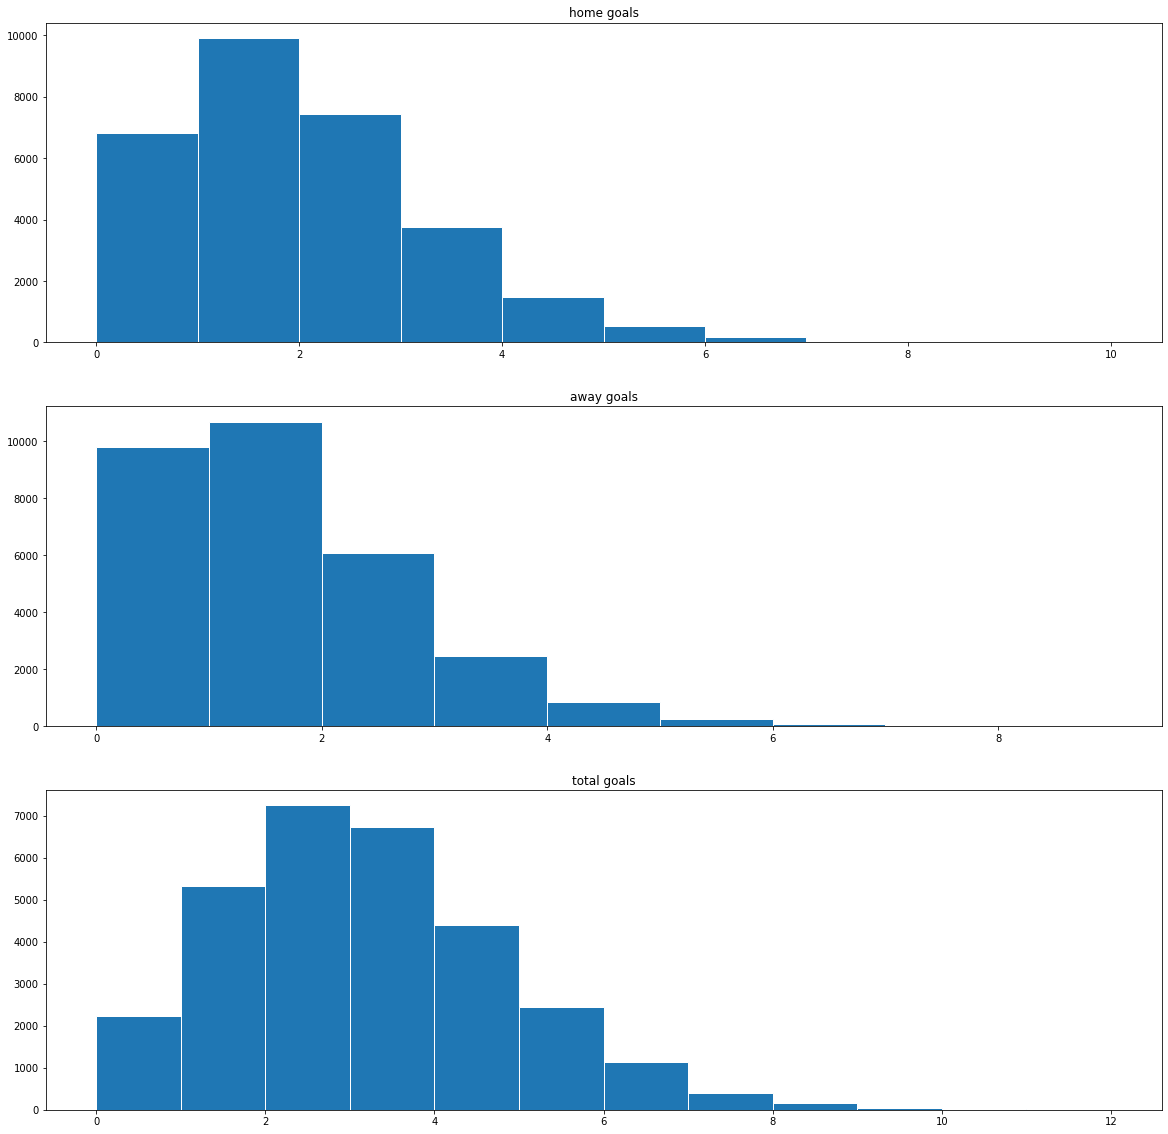

In [30]:
# looking at the distribuition of the data
# staging the figure area and arranging the plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (20, 20))

# preparing the first plot
ax1.hist(new_five38["home_goals"], bins = 10, edgecolor = "white")
ax1.set_title("home goals")

# the second plot
ax2.hist(new_five38["away_goals"], bins = 9, edgecolor = "white")
ax2.set_title("away goals")

# and the third
ax3.hist(new_five38["t_goals"], bins = 12, edgecolor = "white")
ax3.set_title("total goals")

# setting the bkg color to white (in case of export: https://stackoverflow.com/questions/4804005/matplotlib-figure-facecolor-background-color)
fig.set_facecolor("white")
plt.show()

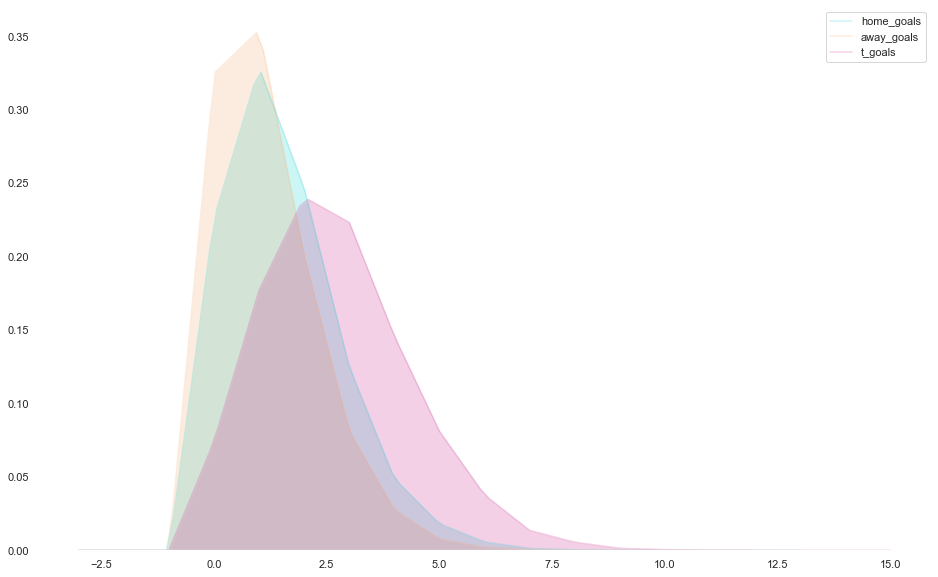

In [31]:
# looking at the distribuition of the data w/
# creating a Density plot

plt.figure(figsize = (16, 10))
sns.set(rc = {"axes.facecolor": "white", "figure.facecolor": "white"})

p1 = sns.kdeplot(new_five38["home_goals"], shade = True, kernel = "tri", alpha = 0.20, 
                 bw = 1, color = "darkturquoise")
p1 = sns.kdeplot(new_five38["away_goals"], shade = True, kernel = "tri", alpha = 0.20, 
                 bw = 1, color = "sandybrown")
p1 = sns.kdeplot(new_five38["t_goals"], shade = True, kernel = "tri", alpha = 0.20, 
                 bw = 1, color = "mediumvioletred")

In [32]:
# Inferential Statistics

In [33]:
# Calculate a few first moments

# Home Goals
home_mu = new_five38["home_goals"].mean()
home_mean, home_var, home_skew, home_kurt = poisson.stats(home_mu, moments = "mvsk")

# Away Goals
away_mu = new_five38["away_goals"].mean()
away_mean, away_var, away_skew, away_kurt = poisson.stats(away_mu, moments = "mvsk")

# Total Goals
t_mu = new_five38["t_goals"].mean()
t_mean, t_var, t_skew, t_kurt = poisson.stats(t_mu, moments = "mvsk")

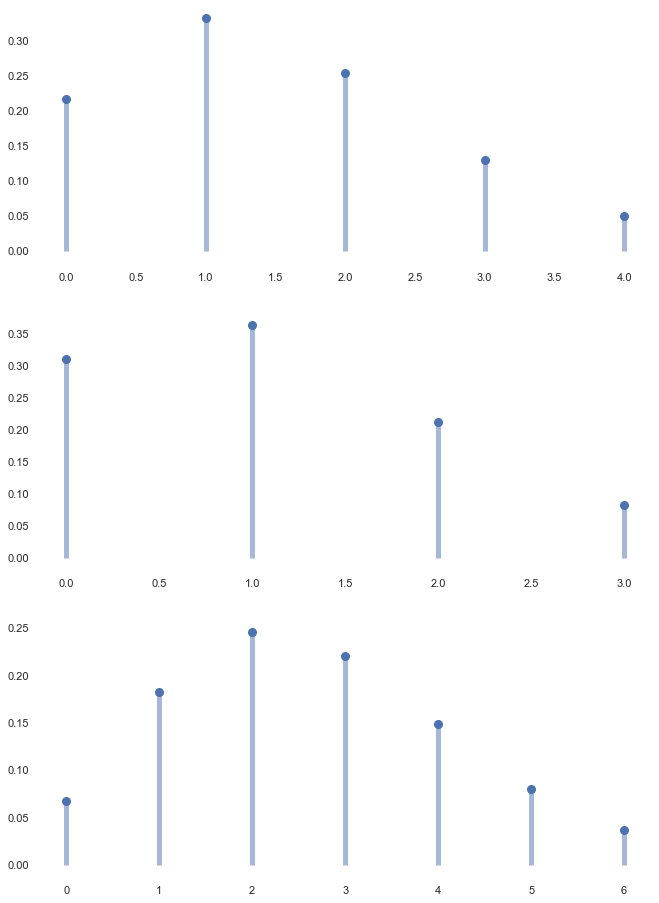

In [34]:
# Display the probability mass function (pmf):
fig, (axhome, axaway, axt) = plt.subplots(3, 1, figsize = (11, 16))

# Home Goals
home_x = np.arange(poisson.ppf(0.01, home_mu), poisson.ppf(0.99, home_mu))
axhome.plot(home_x, poisson.pmf(home_x, home_mu), "bo", ms = 8, 
            label = "Home Goals poisson pmf")
axhome.vlines(home_x, 0, poisson.pmf(home_x, home_mu), colors = "b", lw = 5, alpha = 0.5)

# Away Goals
away_x = np.arange(poisson.ppf(0.01, away_mu), poisson.ppf(0.99, away_mu))
axaway.plot(away_x, poisson.pmf(away_x, away_mu), "bo", ms = 8, 
            label = "Away Goals poisson pmf")
axaway.vlines(away_x, 0, poisson.pmf(away_x, away_mu), colors = "b", lw = 5, alpha = 0.5)

# Total Goals
t_x = np.arange(poisson.ppf(0.01, t_mu), poisson.ppf(0.99, t_mu))
axt.plot(t_x, poisson.pmf(t_x, t_mu), "bo", ms = 8, label = "Total Goals poisson pmf")
axt.vlines(t_x, 0, poisson.pmf(t_x, t_mu), colors = "b", lw = 5, alpha = 0.5)

In [35]:
# defining the x-axis
x_axis = np.arange(0, len(new_five38["home_goals"].value_counts()))

# creating the "frequency distribuition table" for the goals
home_goals = new_five38["home_goals"].value_counts().sort_index()
away_goals = new_five38["away_goals"].value_counts().sort_index()
t_goals = new_five38["t_goals"].value_counts().sort_index()

# chaging it to decimals
home_goals = home_goals / home_goals.sum()
away_goals = away_goals / away_goals.sum()
t_goals = t_goals / t_goals.sum()

# Fitting (this might not be the right word for it...) the data to the Poisson Distribuition
home_poisson = poisson(home_mu)
away_poisson = poisson(away_mu)
t_poisson = poisson(t_mu)

# Getting the pmf for the x_axis on the Distribuition
home_pmf = home_poisson.pmf(x_axis)
away_pmf = away_poisson.pmf(x_axis)
t_pmf = t_poisson.pmf(x_axis)

# Obtaining the values of the "perfect" Poisson Distribuition with these values
home_expected = [home_poisson.pmf(i) for i in range(len(home_goals))]
away_expected = [away_poisson.pmf(i) for i in range(len(away_goals))]
t_expected = [t_poisson.pmf(i) for i in range(len(t_goals))]

# Chi2 testing 
print(chisquare(home_goals, f_exp = home_expected))
print(chisquare(away_goals, f_exp = away_expected))
print(chisquare(t_goals, f_exp = t_expected))

Power_divergenceResult(statistic=0.0029628887391585086, pvalue=0.9999999999999999)
Power_divergenceResult(statistic=0.005135038164919186, pvalue=0.999999999999958)
Power_divergenceResult(statistic=0.0012237806482185156, pvalue=1.0)


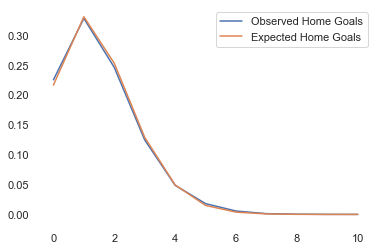

In [36]:
# plotting Chi2 test for the Home Goals
plt.plot(home_goals, label = "Observed Home Goals")
plt.plot(home_expected, label = "Expected Home Goals")
plt.legend()
plt.show()

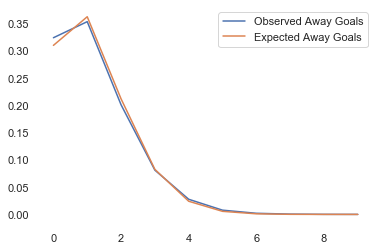

In [37]:
# plotting Chi2 test for the Away Goals
plt.plot(away_goals, label = "Observed Away Goals")
plt.plot(away_expected, label = "Expected Away Goals")
plt.legend()
plt.show()

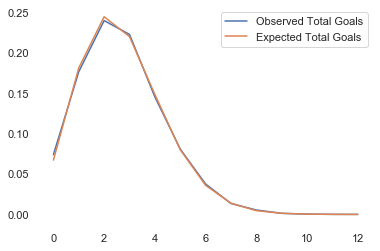

In [38]:
# plotting Chi2 test for the Total Goals
plt.plot(t_goals, label = "Observed Total Goals")
plt.plot(t_expected, label = "Expected Total Goals")
plt.legend()
plt.show()

In [39]:
# rechecking home
chi = sum((home_goals - home_expected) ** 2 / home_expected)
dof = (len(home_goals) - 1)
alpha = 0.05

critical_value = chi2.ppf(q = 1 - alpha, df = dof)   # ppf: Percent Point Function
print("Null hypothesis rejected") if critical_value < chi else print("Null hypothesis can't be rejected")

Null hypothesis can't be rejected


In [40]:
# rechecking away
chi = sum((away_goals - away_expected) ** 2 / away_expected)
dof = (len(away_goals) - 1)
alpha = 0.05

critical_value = chi2.ppf(q = 1 - alpha, df = dof)   # ppf: Percent Point Function
print("Null hypothesis rejected") if critical_value < chi else print("Null hypothesis can't be rejected")

Null hypothesis can't be rejected


In [41]:
# rechecking total
chi = sum((t_goals - t_expected) ** 2 / t_expected)
dof = (len(t_goals) - 1)
alpha = 0.05

critical_value = chi2.ppf(q = 1 - alpha, df = dof)   # ppf: Percent Point Function
print("Null hypothesis rejected") if critical_value < chi else print("Null hypothesis can't be rejected")

Null hypothesis can't be rejected


# IGNORE